# wrangling with the csv

In [1]:
import pandas as pd
import numpy as np
# import statsmodels.discrete.discrete_model as sm
import statsmodels as stt
import scipy.stats as sst
import os.path as osp

In [2]:
from statsmodels import api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'/home/jb/code/repronim/simple2/simple2_analysis'

In [4]:
relative_path_filename = './data/blazegraph-query-all.csv'
assert osp.exists(relative_path_filename)

In [5]:
hie = pd.read_csv(relative_path_filename, na_values='nd')
original_col_names = list(hie)
print(original_col_names)
assert len(original_col_names) == len(set(original_col_names))

['study', 'ID', 'Age', 'Gender', 'diagnostic', 'fiq', 'piq', 'value', 'tool', 'structure']


In [6]:
structures = set(hie.structure)

In [7]:
u2human = {}
for idx, s in enumerate(structures):
    u2human[s] = 'region-' + "{0:02d}".format(idx)

In [8]:
u2human[list(structures)[1]]

'region-01'

In [9]:
len(u2human.keys())

19

In [10]:
u2human[list(u2human.keys())[0]] = 'cavum septum pellucidum'
u2human[list(u2human.keys())[1]] = 'cerebellum'
u2human[list(u2human.keys())[2]] = 'cerebellar cortex'
u2human[list(u2human.keys())[3]] = 'perivascular space'
u2human[list(u2human.keys())[4]] = "Ammon's horn"
u2human[list(u2human.keys())[5]] = "inferior horn of the lateral ventricle"
u2human[list(u2human.keys())[6]] = "brainstem"
u2human[list(u2human.keys())[7]] = "amygdala"
u2human[list(u2human.keys())[8]] = "optic chiasma"
u2human[list(u2human.keys())[9]] = "dorsal plus ventral thalamus"
u2human[list(u2human.keys())[10]] = "cerebral hemisphere"
u2human[list(u2human.keys())[11]] = "caudate nucleus"
u2human[list(u2human.keys())[12]] = "telencephalic ventricle"
u2human[list(u2human.keys())[13]] = "putamen"
u2human[list(u2human.keys())[14]] = "third ventricle"
u2human[list(u2human.keys())[15]] = "choroid plexus"
u2human[list(u2human.keys())[16]] = "fourth ventricle"
u2human[list(u2human.keys())[17]] = "pallidum"
u2human[list(u2human.keys())[18]] = "nucleus accumbens"

In [11]:
h2uberon = {v: k for k, v in u2human.items()}
# print(h2uberon)

In [12]:
# print(set(hie['tool']))
tooldic = {'surfer':'<https://surfer.nmr.mgh.harvard.edu/>', 
           'fsl':'<http://purl.org/nidash/fsl#>'}
print(tooldic)

{'surfer': '<https://surfer.nmr.mgh.harvard.edu/>', 'fsl': '<http://purl.org/nidash/fsl#>'}


In [13]:
hie.head(3)

,study,ID,Age,Gender,diagnostic,fiq,piq,value,tool,structure
0,ABIDE NYU Site,50971,10.24,1,1,122.0,128.0,833.5,<https://surfer.nmr.mgh.harvard.edu/>,<http://purl.obolibrary.org/obo/UBERON_0001882>
1,ABIDE NYU Site,50971,10.24,1,1,122.0,128.0,1693.4,<https://surfer.nmr.mgh.harvard.edu/>,<http://purl.obolibrary.org/obo/UBERON_0001876>
2,ABIDE NYU Site,50971,10.24,1,1,122.0,128.0,4095.2,<https://surfer.nmr.mgh.harvard.edu/>,<http://purl.obolibrary.org/obo/UBERON_0001873>


## hypotheses

Hypotheses

PIET-1: Total Brain Volume will positively correlate with IQ (in both sexes across the complete age range).

MAC-1: Left striatum volume (caudate + putamen) will positively correlate with IQ in the total (male + female) child (age < 20) group.

MAC-2: Left striatum volume (caudate + putamen) will positively correlate with IQ in the male children group.

MAC-3: Left striatum volume (caudate + putamen) will not correlate with IQ in the female children group.

MAC-3: Left striatum volume (caudate + putamen) will not correlate with IQ in the female children group.

GANJ-1: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ.

GANJ-2: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ in the young (age < 12) group.

GANJ-3: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will not significantly correlate with IQ in the adolescent (age > 12) group.

GANJ-4:. Total Corpus Callosum midsagittal area, after correcting for total brain volume, will negatively correlate with IQ in the male (age < 12) group.

GANJ-5: Total Corpus Callosum midsagittal area, after correcting for total brain volume, will not significantly correlate with IQ in the female (age < 12) group.


## Analyses

### sandbox

In [14]:
u_caudate = h2uberon['caudate nucleus']
print(u_caudate)

<http://purl.obolibrary.org/obo/UBERON_0001873>


In [15]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

# tmp = hie[hie.structure==u_caudate][hie.Gender=='1']
# tmp = hie.loc[(hie['Gender']=='1')] # & (hie['Gender']=='Male')]

# Male or '1' for caudate
tmp = hie.loc[((hie['Gender']=='1') | (hie['Gender']=='Male')) 
                               & (hie['structure'] == u_caudate ) 
                               & (hie['tool']==tooldic['surfer'])]


In [16]:
print(set(hie['tool']))
print(tooldic['fsl'])
print(len(hie),len(tmp))


{'<https://surfer.nmr.mgh.harvard.edu/>', '<http://purl.org/nidash/fsl#>'}
<http://purl.org/nidash/fsl#>
58003 2107


### PIET-1: Total Brain Volume will positively correlate with IQ (in both sexes across the complete age range).


In [17]:
roi = 'cerebral hemisphere'
# roi = 'cerebellar cortex'
tool = 'surfer'
# tool = 'fsl'

tmp = hie[['ID','Gender','structure','tool','value','fiq']]
# tmp = tmp.loc[((hie['Gender']=='1') | (hie['Gender']=='Male')) 
tmp = tmp.loc[\
                                (hie['structure'] == h2uberon[roi]) 
                               & (hie['tool']==tooldic[tool])].drop_duplicates()

print(len(hie),len(tmp))

58003 1185


In [18]:
list(tmp)

['ID', 'Gender', 'structure', 'tool', 'value', 'fiq']

In [19]:
print(" Structure = ", roi)
assert u2human[tmp.iloc[0]['structure']] == roi

md = smf.ols("fiq ~ Q('value')", data=tmp)
mdf = md.fit()
print(mdf.summary())


 Structure =  cerebral hemisphere
                            OLS Regression Results                            
Dep. Variable:                    fiq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.789
Date:                Sun, 22 Sep 2019   Prob (F-statistic):              0.181
Time:                        21:56:03   Log-Likelihood:                -10225.
No. Observations:                1150   AIC:                         2.045e+04
Df Residuals:                    1148   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7

### MAC-1: Left striatum volume (caudate + putamen) will positively correlate with IQ in the total (male + female) child (age < 20) group.


In [20]:
roi1 = 'caudate nucleus'
roi2 = 'putamen'
# roi = 'cerebellar cortex'
tool = 'surfer'
# tool = 'fsl'

tmp = hie[['ID','Gender','structure','tool','value','fiq']]
# condition1 = ((hie['Gender']=='1') | (hie['Gender']=='Male')) & 

condition1 = (hie['structure'] == h2uberon[roi1]) & (hie['tool']==tooldic[tool]) \
             & (hie['Age'] < 20) 
condition2 = (hie['structure'] == h2uberon[roi2]) & (hie['tool']==tooldic[tool]) \
             & (hie['Age'] < 20)

    
tmp1 = tmp.loc[condition1].drop_duplicates()
tmp2 = tmp.loc[condition2].drop_duplicates()
#tmp1 = tmp1.set_index('ID')
#tmp2 = tmp2.set_index('ID')


print(len(hie),len(tmp1),len(tmp2))
print(len(tmp1.drop_duplicates()),len(tmp2.drop_duplicates()))


58003 1897 1898
1897 1898


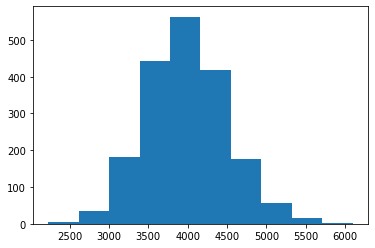

In [21]:
ax = plt.hist(tmp1['value'])

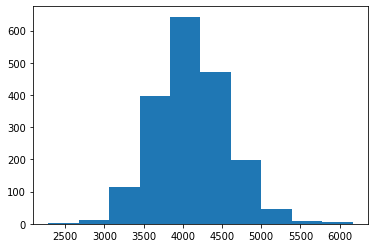

In [31]:
ax = plt.hist(tmp2['value'])

In [22]:
# tmp2.head(2)

In [23]:
# tmp1.head(2)

In [24]:
# hie.loc[(hie['ID']==21002) & (hie['structure']==h2uberon[roi1]) & (hie['tool']==tooldic['surfer'])]

#### try to add values of the same index

In [25]:
tmp_1 = tmp1.groupby(['ID']).mean().dropna()
tmp_2 = tmp2.groupby(['ID']).mean().dropna()

In [26]:
len(tmp_2), len(tmp_1)
assert np.all(tmp_1.index == tmp_2.index)

In [27]:
""" print(type(tmp_2))
print(list(tmp_2))
print(tmp_2['value'][:5])
print(tmp_1['value'][:5]) """;

In [28]:
datadf = tmp_2
datadf['cau_put'] = tmp_2.loc[:,'value'].add(tmp_1.loc[:,'value'])
datadf['fiq'] = tmp_2['fiq']
print(list(datadf))

['value', 'fiq', 'cau_put']


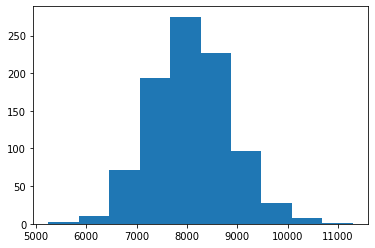

In [32]:
#datadf = datadf[datadf['cau_put'] < 15000]
len(datadf)
ax = plt.hist(datadf['cau_put'])

In [33]:

md = smf.ols("fiq ~ Q('cau_put')", data=datadf)
mdf = md.fit()
print(mdf.summary())


                            OLS Regression Results                            
Dep. Variable:                    fiq   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.963
Date:                Sun, 22 Sep 2019   Prob (F-statistic):            0.00846
Time:                        21:57:13   Log-Likelihood:                -7492.3
No. Observations:                 914   AIC:                         1.499e+04
Df Residuals:                     912   BIC:                         1.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      819.5747    300.719      2.725   

In [ ]:
merged_inner = pd.merge(left=tmp_1, right=tmp_2) #, left_on='ID', right_on='ID') #how='join', 

In [ ]:
list(merged_inner)

In [ ]:
#tmp = hie.loc[ (hie['structure']==h2uberon[roi]) & (hie['tool']==tooldic['surfer'])]
#tmp.head(3)

In [ ]:
#tmp_ = tmp1.groupby(['ID']).min()
#tmp_.head(3)

In [ ]:
# horizontal_stack = pd.concat([tmp1, tmp2], axis=1)
merged_inner = pd.merge(left=tmp1, right=tmp2, left_on='ID', right_on='ID') #how='join', 

In [ ]:
len(merged_inner.drop_duplicates())

In [ ]:
merged_inner.head(4)

In [ ]:
md = smf.ols("FIQ ~ Q('striatal volume')", data=data2)
mdf = md.fit()
print(mdf.summary())
print(pearsonr(data2['FIQ'], data2['striatal volume']))

In [ ]:
print(tmp.loc[(tmp['ID']==3559087)])

In [ ]:
hie.iloc[1578]

In [ ]:
hie.iloc[1577]

In [ ]:
uberon = "http://purl.obolibrary.org/obo/UBERON_0001897"

cmd = 'wget -O - ' + uberon\
                   + '  | grep -A 1 ' +  "'" + 'Class rdf:about='\
                   + '"' + uberon + '"' +  "'"

In [ ]:
print(cmd.split())

In [ ]:
import subprocess
MyOut = subprocess.Popen(cmd.split(), 
            stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT, shell=True)
stdout,stderr = MyOut.communicate()
print(stdout)
#print(stderr)

In [ ]:
process = subprocess.run(cmd.split())

In [ ]:
list(hie)

In [ ]:
uberon= '<http://purl.obolibrary.org/obo/UBERON_0001897>'


In [ ]:
len(tmp)

In [ ]:
# Load in the dataset, appending 'nd' to the list of possible na_values
hie = pd.read_csv(relative_path_filename, na_values='nd')
original_col_names = list(hie)
print(original_col_names[:10])

# column names are unique
assert len(original_col_names) == len(set(original_col_names))